In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1. wykonać pomiary charakterystyk prądowo-napięciowych

intensywność światła $1064 W/m^2$ 

zakres charakterystyki $<-0.1 , 0.9> V$ 

pomiary $15 - 75$ co $ 10^o C$, wszystkie w pliku `temp/`

In [45]:
temp = {}
temp["15"] = pd.read_csv("in/temp/temp15", sep='\s+')
temp["25"] = pd.read_csv("in/temp/temp25", sep='\s+')
temp["35"] = pd.read_csv("in/temp/temp35", sep='\s+')
temp["45"] = pd.read_csv("in/temp/temp45", sep='\s+')
temp["55"] = pd.read_csv("in/temp/temp55", sep='\s+')
temp["65"] = pd.read_csv("in/temp/temp65", sep='\s+')
temp["75"] = pd.read_csv("in/temp/temp75", sep='\s+')

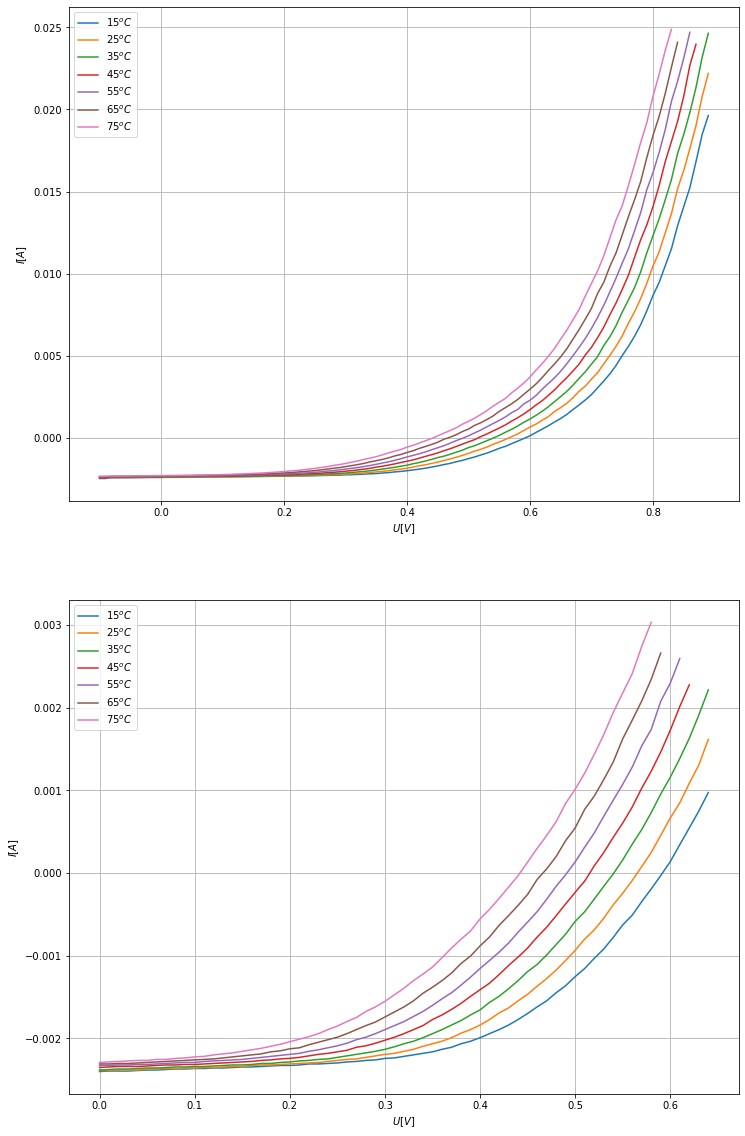

In [46]:
fig, ax = plt.subplots(2,1, figsize =(12,20))

for key in temp:
    x = temp[key]["U"]
    y = temp[key]["I"]
    ax[0].plot(x,y, label=(key + r'$^o C$'))
    lo, hi = (10,-25)
    ax[1].plot(x.iloc[lo:hi],y.iloc[lo:hi], label=(key + r'$^o C$'))

ax[0].set_xlabel(r'$U[V]$')
ax[0].set_ylabel(r'$I[A]$')
ax[0].legend()
ax[0].grid()

ax[1].set_xlabel(r'$U[V]$')
ax[1].set_ylabel(r'$I[A]$')
ax[1].legend()
ax[1].grid()

plt.savefig('out/img/charakterystyka_temp.jpg', dpi = 450)

plt.show()

2. Wyznaczyć parametry:

Short Circuit Current:

$I_{sc} = ? $

Open Circuit Voltage:

$V_{oc} = \dfrac{A k_B T}{e} \ln{\left( \dfrac{I_{sc}}{I_o} + 1 \right)} \approx \dfrac{A k_B T}{e} \ln{ \dfrac{I_{sc}}{I_o} }$


Współczynnik wypełnienia:

$FF = \dfrac{I_{mp} V_{mp}}{I_{sc} V_{oc}}$

Wydajność:

$\eta = \dfrac{I_{mp} V_{mp}}{P_{in}}$

$I_{mp}$ , $U_{mp}$ - maximum power current and voltage, respectively

$P_{in}$ - moc promieniowania padająca na ogniwo

In [47]:
params = pd.DataFrame()
params['T'] = [int(x) for x in temp]
params['u_T'] = [1/np.sqrt(3) for i in range(len(params['T']))]
#fancy odczytywanie z wykresu
U_oc = []
for x in temp:
    y = temp[x].copy()
    y['I'] = y['I'].abs()
    I_min = -y["I"].min()
    minimizing_abs_I = y.loc[y['I'] == y["I"].min()]
    U_oc.append(float(minimizing_abs_I['U']))
params['Uoc'] = U_oc

In [48]:
I_sc = []
for x in temp:
    y = temp[x].copy()
    y['U'] = y['U'].abs()
    U_min = y["U"].min()
    minimizing_abs_U = y.loc[y['U'] == y["U"].min()]
    I_sc.append(-float(-minimizing_abs_U['I']))
params['Isc'] = I_sc

In [49]:
I_mp = []
U_mp = []
for x in temp:
    y = temp[x].copy()
    y['P'] = (y['U'] * y['I']).abs()
    max_power = y.loc[y['P'] == y["P"][0:40].max()]
    I_mp.append(float(max_power['I']))
    U_mp.append(float(max_power['U']))
params['Imp'] = I_mp
params['Ump'] = U_mp

In [50]:
_I = 1000 # W/m^2
_A = 1.5e-5 # m**2
_P = _I*_A
params['max_power'] = (params['Imp']*params['Ump'])
params['FF'] = (params['Imp']*params['Ump'])/(params['Isc']*params['Uoc'])
params['eta'] = ( (params['Imp']*params['Ump'])/_P ).abs()
params.to_csv('out/csv/params_temp.csv', index = False)
params

,T,u_T,Uoc,Isc,Imp,Ump,max_power,FF,eta
0,15,0.57735,0.59,-0.002402,-0.002261,0.29,-0.000656,0.462790,0.043720
1,25,0.57735,0.57,-0.002390,-0.002213,0.29,-0.000642,0.471077,0.042776
2,35,0.57735,0.54,-0.002383,-0.002158,0.29,-0.000626,0.486141,0.041713
3,45,0.57735,0.52,-0.002353,-0.002060,0.29,-0.000597,0.488237,0.039825
4,55,0.57735,0.49,-0.002329,-0.001944,0.29,-0.000564,0.494080,0.037582
5,65,0.57735,0.47,-0.002310,-0.001804,0.29,-0.000523,0.481686,0.034868
6,75,0.57735,0.44,-0.002292,-0.001749,0.27,-0.000472,0.468161,0.031474


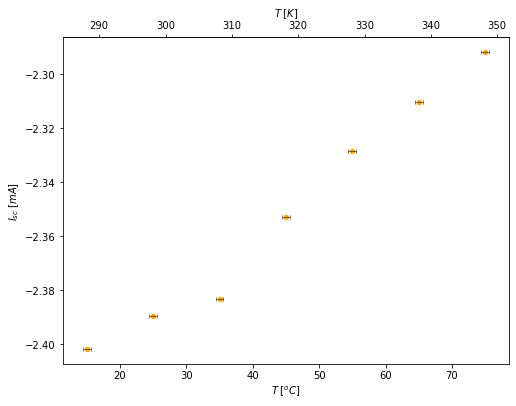

In [51]:

def C_to_K(x):
    return x + 273.15
def K_to_C(x):
    return x - 273.15

plt.figure(figsize=(8,6))

dotcolor = 'orange'
dotsize = 20
plt.scatter(params['T'], params['Isc']*1000, s=dotsize, color = dotcolor)
plt.errorbar(params['T'], params['Isc']*1000,xerr=params['u_T'],capthick=0.5,capsize=2,elinewidth=0.5, color='black', fmt="none")

fig = plt.subplot(111)
plt.xlabel(r'$T \; [^oC]$')
# fancy 2nd axis
secax = fig.secondary_xaxis('top', functions=(C_to_K, K_to_C))
secax.set_xlabel(r'$T \; [K]$')
plt.ylabel(r'$I_{sc} \; [mA]$')

plt.savefig('out/img/wyk_Isc_od_T.jpg', dpi=350)

plt.show()

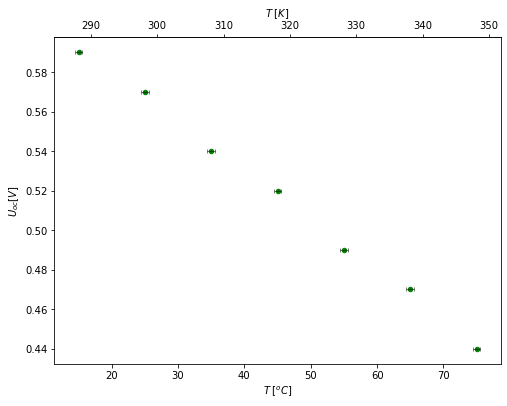

In [52]:

plt.figure(figsize=(8,6))

dotcolor = 'green'
plt.scatter(params['T'], params['Uoc'], s=dotsize, color = dotcolor)
plt.errorbar(params['T'], params['Uoc'],xerr=params['u_T'],capthick=0.5,capsize=2,elinewidth=0.5, color='black', fmt="none")

fig = plt.subplot(111)
plt.xlabel(r'$T \; [^oC]$')
# fancy 2nd axis
secax = fig.secondary_xaxis('top', functions=(C_to_K, K_to_C))
secax.set_xlabel(r'$T \; [K]$')
plt.ylabel(r'$U_{oc} [V]$')

plt.savefig('out/img/wyk_Uoc_od_T.jpg', dpi=350)

plt.show()

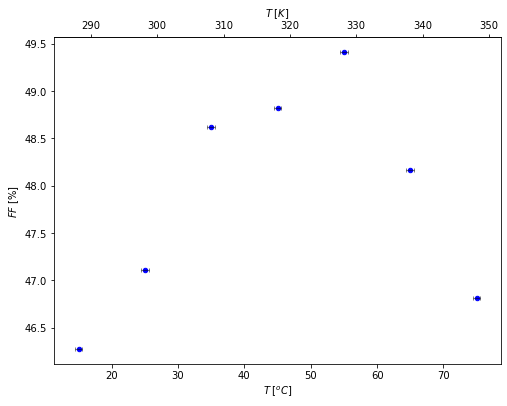

In [53]:

plt.figure(figsize=(8,6))

dotcolor = 'blue'
plt.scatter(params['T'], params['FF']*100, s=dotsize, color = dotcolor)
plt.errorbar(params['T'], params['FF']*100,xerr=params['u_T'],capthick=0.5,capsize=2,elinewidth=0.5, color='black', fmt="none")

fig = plt.subplot(111)
plt.xlabel(r'$T \; [^oC]$')
# fancy 2nd axis
secax = fig.secondary_xaxis('top', functions=(C_to_K, K_to_C))
secax.set_xlabel(r'$T \; [K]$')
plt.ylabel(r'$FF \; [\%]$')


plt.savefig('out/img/wyk_FF_od_T.jpg', dpi=350)

plt.show()

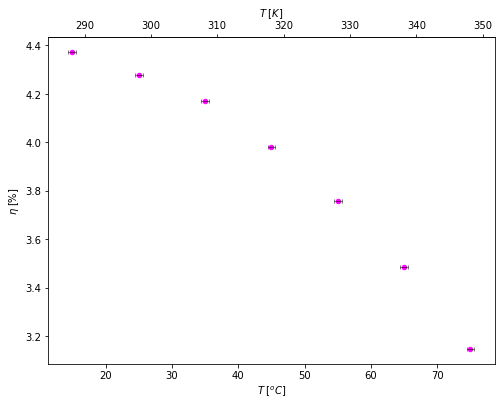

In [54]:

plt.figure(figsize=(8,6))

dotcolor = 'magenta'
plt.scatter(params['T'], params['eta']*100, s=dotsize, color = dotcolor)
plt.errorbar(params['T'], params['eta']*100,xerr=params['u_T'],capthick=0.5,capsize=2,elinewidth=0.5, color='black', fmt="none")

fig = plt.subplot(111)
plt.xlabel(r'$T \; [^oC]$')
# fancy 2nd axis
secax = fig.secondary_xaxis('top', functions=(C_to_K, K_to_C))
secax.set_xlabel(r'$T \; [K]$')
plt.ylabel(r'$\eta \; [\%]$')

plt.savefig('out/img/wyk_eta_od_T.jpg', dpi=350)

plt.show()